In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
pip install innvestigate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.1
    Uninstalling google-auth-oauthlib-1.2.1:
      Successfully uninstalled google-auth-oauthlib-1.2.1
  Attempting uninstall: ten

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# PREDICTION USING ANN

In [ ]:
# Disable eager execution
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

Train on 2732 samples, validate on 683 samples
Epoch 1/50
2732/2732 [==============================] - 0s 101us/sample - loss: 0.7081 - accuracy: 0.4956 - val_loss: 0.6539 - val_accuracy: 0.6296
Epoch 2/50
2560/2732 [===========================>..] - ETA: 0s - loss: 0.6112 - accuracy: 0.6184

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2732/2732 [==============================] - 0s 51us/sample - loss: 0.6084 - accuracy: 0.6182 - val_loss: 0.5481 - val_accuracy: 0.6223
Epoch 3/50
2732/2732 [==============================] - 0s 54us/sample - loss: 0.4763 - accuracy: 0.6541 - val_loss: 0.4122 - val_accuracy: 0.8287
Epoch 4/50
2732/2732 [==============================] - 0s 75us/sample - loss: 0.3270 - accuracy: 0.8971 - val_loss: 0.2322 - val_accuracy: 0.9341
Epoch 5/50
2732/2732 [==============================] - 0s 78us/sample - loss: 0.2203 - accuracy: 0.9261 - val_loss: 0.1792 - val_accuracy: 0.9385
Epoch 6/50
2732/2732 [==============================] - 0s 100us/sample - loss: 0.1965 - accuracy: 0.9334 - val_loss: 0.1614 - val_accuracy: 0.9444
Epoch 7/50
2732/2732 [==============================] - 0s 69us/sample - loss: 0.1874 - accuracy: 0.9352 - val_loss: 0.1544 - val_accuracy: 0.9429
Epoch 8/50
2732/2732 [==============================] - 0s 66us/sample - loss: 0.1780 - accuracy: 0.9374 - val_loss: 0.1475 - va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


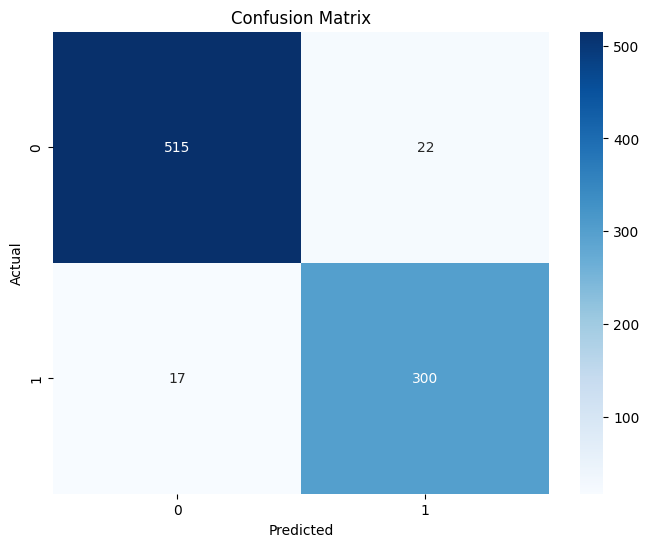

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import innvestigate
import tensorflow as tf
from graphviz import Digraph

# Increase recursion limit
import sys
sys.setrecursionlimit(1500)

# Load and preprocess the data
# train_df = pd.read_csv('/content/train_loan_approval_dataset.csv')
# test_df = pd.read_csv('/content/test_loan_approval_dataset.csv')

train_df = pd.read_csv('/content/train_loan_approval_dataset.csv')
test_df = pd.read_csv('/content/test_loan_approval_dataset.csv')

# Save loan_ids before dropping
loan_ids_test = test_df['loan_id']
train_df.drop(columns=['loan_id'], inplace=True)
test_df.drop(columns=['loan_id'], inplace=True)

# Rename columns
train_df.rename(columns=lambda X: X.strip(), inplace=True)
test_df.rename(columns=lambda X: X.strip(), inplace=True)

# Combine train and test data for label encoding
combined_df = pd.concat([train_df, test_df])

# Label encoding
label_encoder = LabelEncoder()
combined_df['education'] = label_encoder.fit_transform(combined_df['education'])
combined_df['self_employed'] = label_encoder.fit_transform(combined_df['self_employed'])
combined_df['loan_status'] = label_encoder.fit_transform(combined_df['loan_status'])

# Split the combined data back into train and test sets
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

# Define features and target
X_train = train_df.drop(columns=['loan_status'])
y_train = train_df['loan_status']
X_test = test_df.drop(columns=['loan_status'])
y_test = test_df['loan_status']


# Save the column names
feature_names = X_train.columns

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the ANN model using only ReLU activations
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# CRP FOR ANN

In [ ]:
# Choose an instance from the test set to explain
instance_idx = 127
instance_to_explain = X_test[instance_idx].reshape(1, -1)
loan_id_to_explain = loan_ids_test.iloc[instance_idx]  # Get loan_id for this instance

# Predict the loan status for the instance
predicted_loan_status = (model.predict(instance_to_explain) > 0.5).astype("int32")

print("\n",model.predict(instance_to_explain))
print("\n",predicted_loan_status,"\n")

# Display the prediction result
if predicted_loan_status == 1:
    print(f"The loan (ID: {loan_id_to_explain}) is rejected.")
else:
    print(f"The loan (ID: {loan_id_to_explain}) is approved.")


 [[0.9999388]]

 [[1]] 

The loan (ID: 3227) is rejected.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Loan ID to Explain: 3227


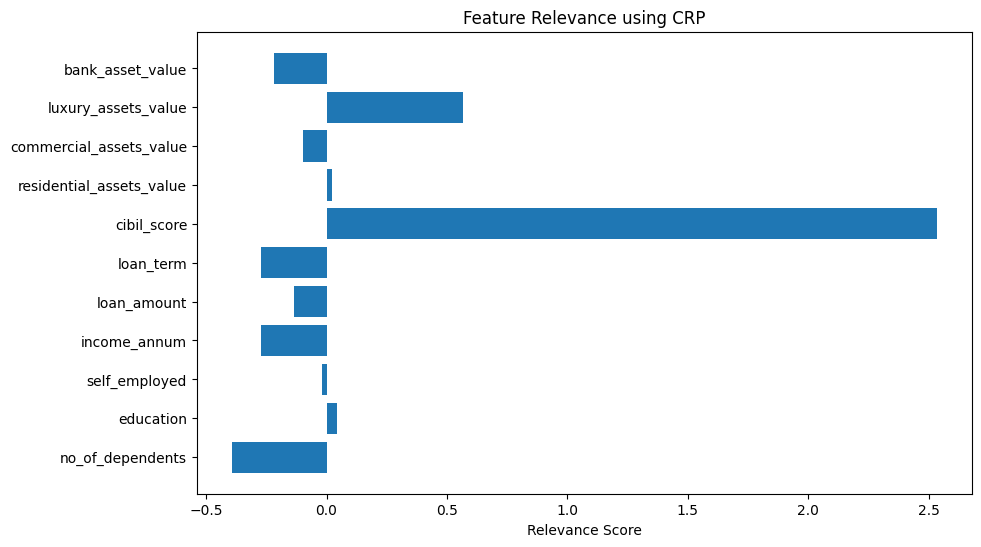


 [[0.9999388]]

 [[1]] 



In [ ]:
# Ensure X_train is a DataFrame with column names
X_train = pd.DataFrame(X_train, columns=feature_names)

# Use lrp.epsilon analyzer
analyzer = innvestigate.create_analyzer("lrp.epsilon", model)

# Apply the analyzer to the instance
analysis = analyzer.analyze(instance_to_explain)

# Normalize the attributions and sum them for each feature
feature_importances = np.sum(analysis, axis=0)

# Plot the relevance scores
loan_id_to_explain = loan_ids_test.iloc[instance_idx]
print("Loan ID to Explain:", loan_id_to_explain)

# Get feature names from DataFrame
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Relevance Score')
plt.title('Feature Relevance using CRP')
plt.show()

# Predict the loan status for the instance
predicted_loan_status = (model.predict(instance_to_explain) > 0.5).astype("int32")

print("\n", model.predict(instance_to_explain))
print("\n", predicted_loan_status, "\n")

Loan ID to Explain: 3227


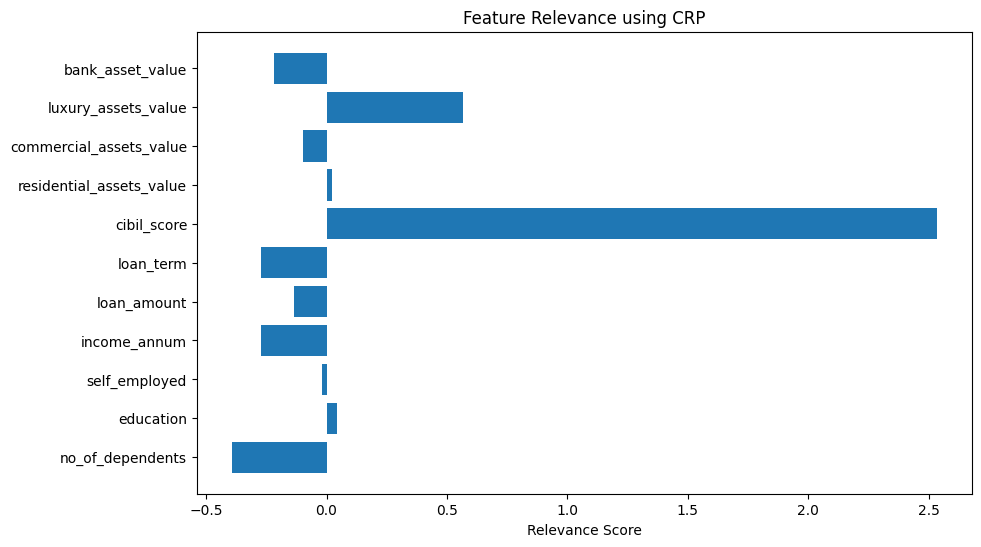

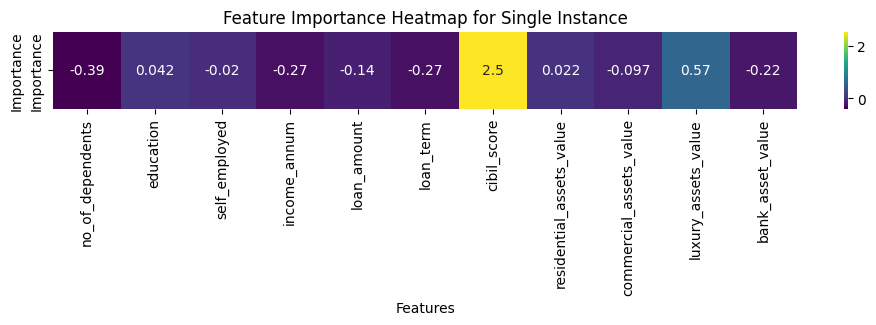


 [[0.9999388]]

 [[1]] 



In [ ]:
import pandas as pd
import numpy as np
import innvestigate
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_train is a DataFrame with column names
X_train = pd.DataFrame(X_train, columns=feature_names)

# Use lrp.epsilon analyzer
analyzer = innvestigate.create_analyzer("lrp.epsilon", model)

# Apply the analyzer to the instance
# instance_to_explain = X_train.iloc[instance_idx].values.reshape(1, -1)
analysis = analyzer.analyze(instance_to_explain)

# Normalize the attributions and sum them for each feature
feature_importances = np.sum(analysis, axis=0)

# Plot the relevance scores for a single instance
loan_id_to_explain = loan_ids_test.iloc[instance_idx]
print("Loan ID to Explain:", loan_id_to_explain)

# Get feature names from DataFrame
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Relevance Score')
plt.title('Feature Relevance using CRP')
plt.show()

# Heatmap for the single instance
feature_importances_instance_df = pd.DataFrame(feature_importances, index=feature_names, columns=["Importance"])

plt.figure(figsize=(12, 1))
sns.heatmap(feature_importances_instance_df.T, annot=True, cmap="viridis", cbar=True)
plt.title("Feature Importance Heatmap for Single Instance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Predict the loan status for the instance
predicted_loan_status = (model.predict(instance_to_explain) > 0.5).astype("int32")

print("\n", model.predict(instance_to_explain))
print("\n", predicted_loan_status, "\n")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Loan ID to Explain: 3227


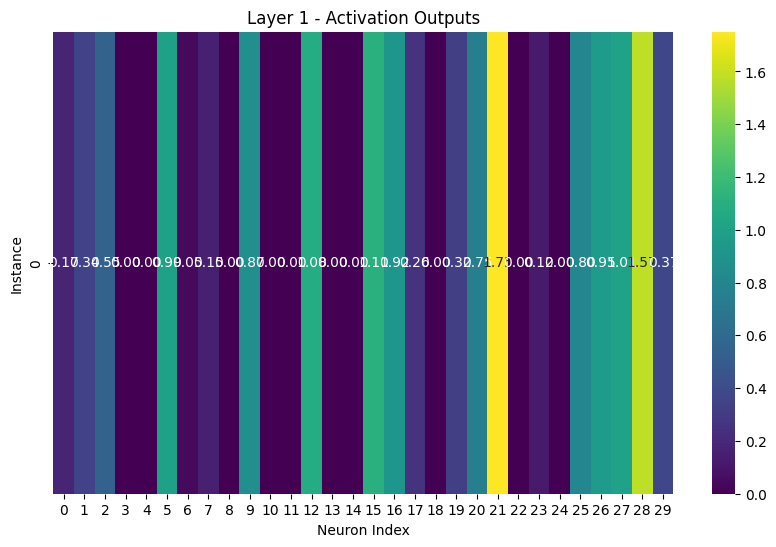

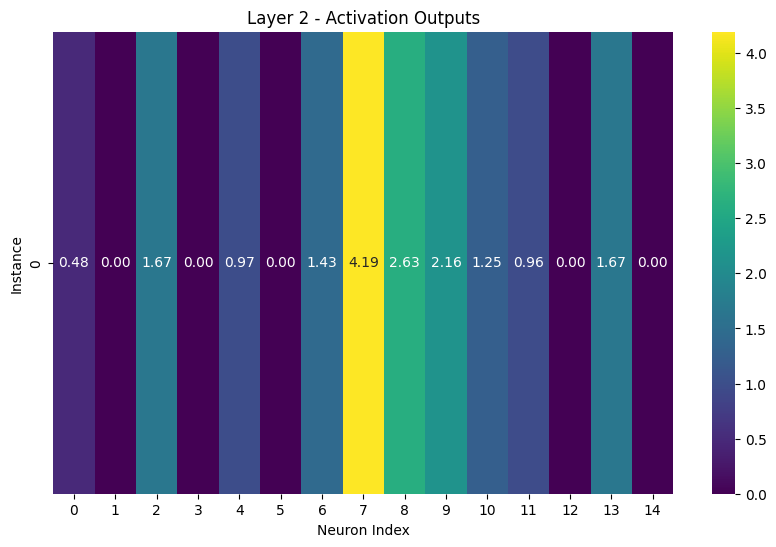

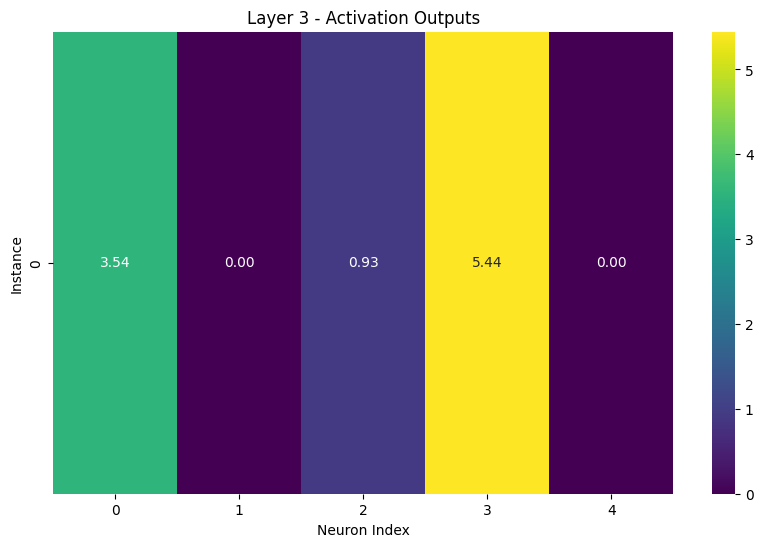

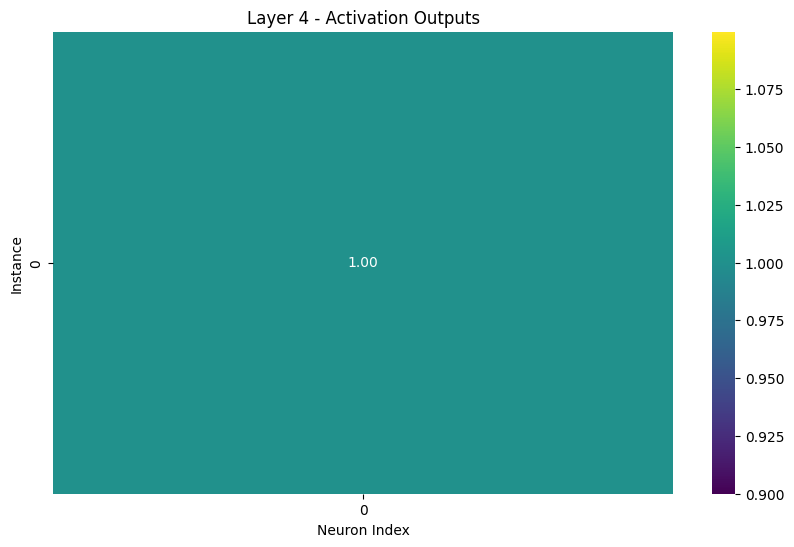


 [[0.9999388]]

 [[1]] 



In [ ]:
# Capture neuron outputs at each layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(instance_to_explain)

loan_id_to_explain = loan_ids_test.iloc[instance_idx]
print("Loan ID to Explain:", loan_id_to_explain)

# Plot heatmap of neuron outputs for each layer
for i, activation in enumerate(activations):
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(activation, cmap='viridis', annot=True, fmt='.2f')
    plt.title(f'Layer {i+1} - Activation Outputs')
    plt.xlabel('Neuron Index')
    plt.ylabel('Instance')
    plt.show()

# Predict the loan status for the instance
predicted_loan_status = (model.predict(instance_to_explain) > 0.5).astype("int32")

print("\n",model.predict(instance_to_explain))
print("\n",predicted_loan_status,"\n")


Loan ID to Explain: 3227
Layer 1 - Neuron Information:


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


,Neuron Number,Output Value,Feature,Contribution
0,0,0.174547,no_of_dependents,-0.592962
1,1,0.342364,no_of_dependents,-0.592962
2,2,0.551036,no_of_dependents,-0.592962
3,3,0.000000,no_of_dependents,-0.592962
4,4,0.000000,no_of_dependents,-0.592962
...,...,...,...,...
325,25,0.801105,bank_asset_value,0.159018
326,26,0.954333,bank_asset_value,0.159018
327,27,1.006752,bank_asset_value,0.159018
328,28,1.574045,bank_asset_value,0.159018


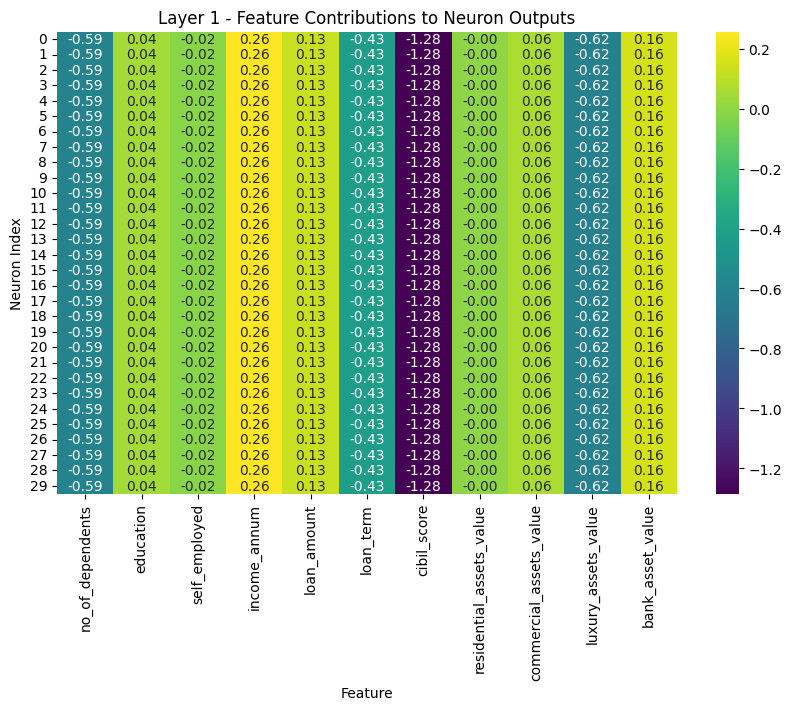

Layer 2 - Neuron Information:


,Neuron Number,Output Value,Feature,Contribution
0,0,0.475093,no_of_dependents,-0.592962
1,1,0.000000,no_of_dependents,-0.592962
2,2,1.669009,no_of_dependents,-0.592962
3,3,0.000000,no_of_dependents,-0.592962
4,4,0.970375,no_of_dependents,-0.592962
...,...,...,...,...
160,10,1.253882,bank_asset_value,0.159018
161,11,0.956061,bank_asset_value,0.159018
162,12,0.000000,bank_asset_value,0.159018
163,13,1.666552,bank_asset_value,0.159018


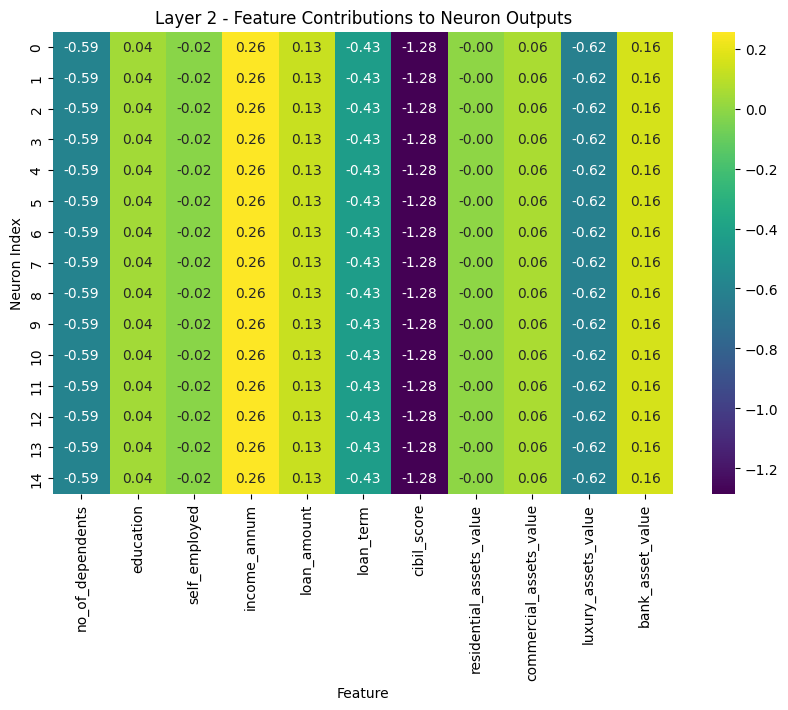

Layer 3 - Neuron Information:


,Neuron Number,Output Value,Feature,Contribution
0,0,3.540170,no_of_dependents,-0.592962
1,1,0.000000,no_of_dependents,-0.592962
2,2,0.930122,no_of_dependents,-0.592962
3,3,5.444632,no_of_dependents,-0.592962
4,4,0.000000,no_of_dependents,-0.592962
5,0,3.540170,education,0.042511
6,1,0.000000,education,0.042511
7,2,0.930122,education,0.042511
8,3,5.444632,education,0.042511
9,4,0.000000,education,0.042511


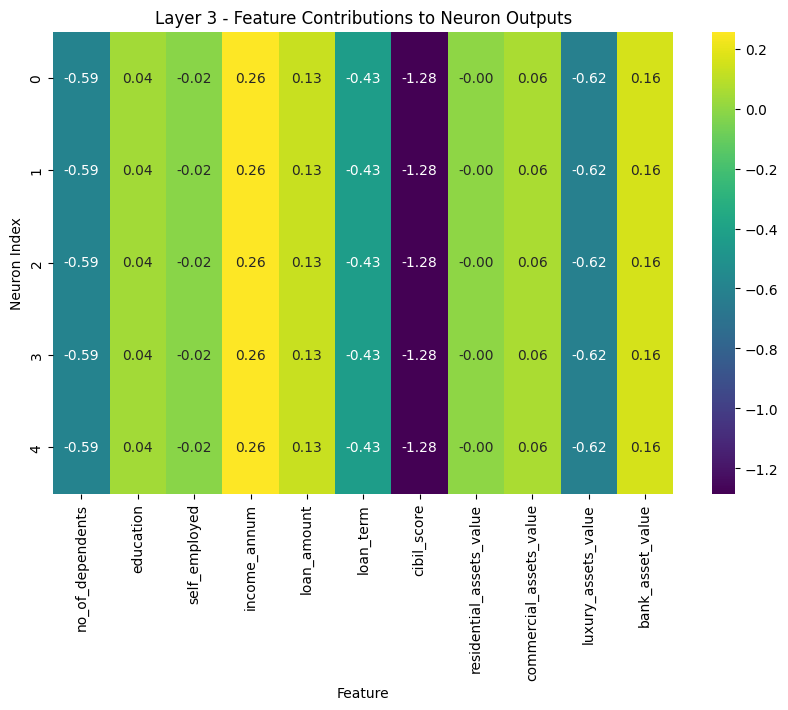

Layer 4 - Neuron Information:


,Neuron Number,Output Value,Feature,Contribution
0,0,0.999939,no_of_dependents,-0.592962
1,0,0.999939,education,0.042511
2,0,0.999939,self_employed,-0.019623
3,0,0.999939,income_annum,0.256479
4,0,0.999939,loan_amount,0.130072
5,0,0.999939,loan_term,-0.432561
6,0,0.999939,cibil_score,-1.283805
7,0,0.999939,residential_assets_value,-0.003668
8,0,0.999939,commercial_assets_value,0.063586
9,0,0.999939,luxury_assets_value,-0.617107


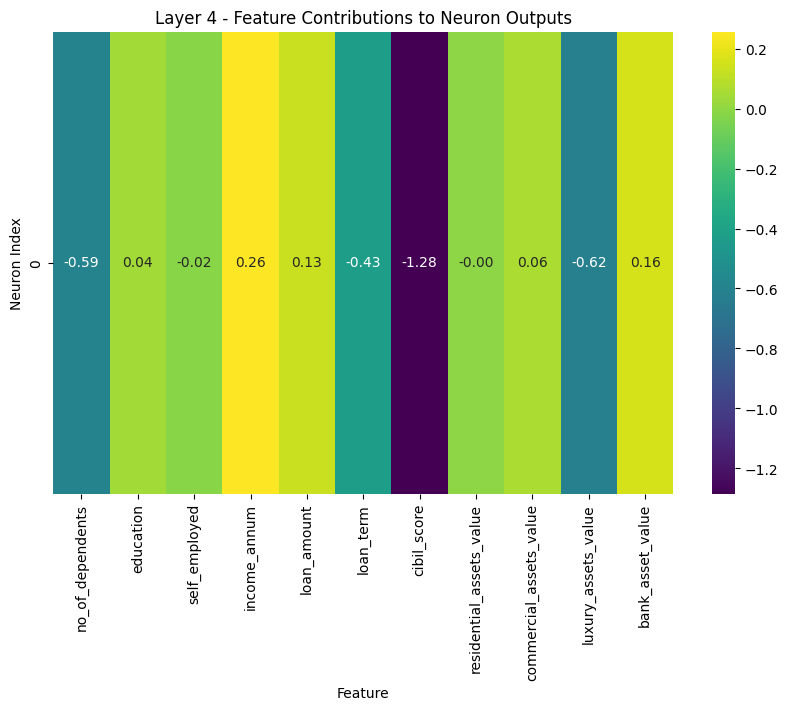


 [[0.9999388]]

 [[1]] 


 The loan is rejected.


In [ ]:
# Capture neuron outputs at each layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(instance_to_explain)

loan_id_to_explain = loan_ids_test.iloc[instance_idx]
print("Loan ID to Explain:", loan_id_to_explain)

# Define a function to calculate and display feature contributions
def calculate_feature_contributions(activations, analysis, feature_names):
    feature_contributions = []
    for i, activation in enumerate(activations):
        layer_contributions = []
        if len(activation.shape) == 2:  # Multiple neurons in this layer
            for j in range(activation.shape[1]):
                neuron_contributions = analysis[0, :] * instance_to_explain[0]
                layer_contributions.append(neuron_contributions)
        else:  # Single neuron (output layer)
            neuron_contributions = analysis[0, :] * instance_to_explain[0]
            layer_contributions.append(neuron_contributions)
        feature_contributions.append(np.array(layer_contributions))
    return feature_contributions

# Calculate feature contributions
feature_contributions = calculate_feature_contributions(activations, analysis, feature_names)

# Plot feature contributions for each neuron in each layer
for i, layer_contributions in enumerate(feature_contributions):
    print(f"Layer {i+1} - Neuron Information:")
    neuron_info = pd.DataFrame(layer_contributions, columns=feature_names)
    neuron_info['Neuron Number'] = neuron_info.index
    if len(activations[i].shape) == 2:
        neuron_info['Output Value'] = activations[i].flatten()
    else:
        neuron_info['Output Value'] = activations[i]
    neuron_info = neuron_info.melt(id_vars=['Neuron Number', 'Output Value'], var_name='Feature', value_name='Contribution')
    display(neuron_info)

    # Plot heatmap of feature contributions
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(layer_contributions, cmap='viridis', annot=True, fmt='.2f', xticklabels=feature_names)
    plt.title(f'Layer {i+1} - Feature Contributions to Neuron Outputs')
    plt.xlabel('Feature')
    plt.ylabel('Neuron Index')
    plt.show()

# Predict the loan status for the instance
predicted_loan_status = (model.predict(instance_to_explain) > 0.5).astype("int32")

print("\n",model.predict(instance_to_explain))
print("\n",predicted_loan_status,"\n")

# Display the prediction result
if predicted_loan_status == 1:
    print("\n","The loan is rejected.")
else:
    print("\n","The loan is approved.")

In [ ]:
# Create an analyzer for CRP
analyzer = innvestigate.create_analyzer("lrp.epsilon", model)

# Apply the analyzer to the instance
analysis = analyzer.analyze(instance_to_explain)

# Normalize the attributions and sum them for each feature
feature_importances = np.sum(analysis, axis=0)

# Capture neuron outputs at each layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(instance_to_explain)

# Function to calculate and display feature contributions
def calculate_feature_contributions(activations, analysis, feature_names):
    feature_contributions = []
    for i, activation in enumerate(activations):
        layer_contributions = []
        if len(activation.shape) == 2:  # Multiple neurons in this layer
            for j in range(activation.shape[1]):
                neuron_contributions = analysis[0, :] * instance_to_explain[0]
                layer_contributions.append(neuron_contributions)
        else:  # Single neuron (output layer)
            neuron_contributions = analysis[0, :] * instance_to_explain[0]
            layer_contributions.append(neuron_contributions)
        feature_contributions.append(np.array(layer_contributions))
    return feature_contributions

# Calculate feature contributions
feature_contributions = calculate_feature_contributions(activations, analysis, feature_names)

# Function to construct decision tree based on neuron contributions
def construct_decision_tree(layer_contributions, feature_names, activations, layer_idx=0, neuron_idx=0, path=[]):
    if layer_idx >= len(layer_contributions):
        return path

    neuron_contributions = layer_contributions[layer_idx][neuron_idx]
    top_features_idx = np.argsort(np.abs(neuron_contributions))[-4:][::-1]
    top_features = [(feature_names[idx], neuron_contributions[idx]) for idx in top_features_idx]
    path.append((layer_idx + 1, neuron_idx + 1, top_features))

    next_layer_idx = layer_idx + 1
    if next_layer_idx < len(layer_contributions):
        next_neuron_idx = np.argmax(activations[next_layer_idx][0])
        path = construct_decision_tree(layer_contributions, feature_names, activations, next_layer_idx, next_neuron_idx, path)
    return path

# Construct the decision tree
decision_tree_path = construct_decision_tree(feature_contributions, feature_names, activations)
print("Decision Tree Path:\n", decision_tree_path)

# Function to visualize the ANN with the decision path
def visualize_ann_with_path(model, decision_tree_path, feature_names):
    dot = Digraph(comment='ANN Decision Path', engine='dot')
    dot.attr(size='100,100')  # Adjust the size for better readability
    dot.attr(rankdir='LR')  # Left to Right layout
    dot.attr(nodesep='2')
    dot.attr(ranksep='1')

    # Add nodes for input features
    for i, feature in enumerate(feature_names):
        dot.node(f'Input_{i+1}', label=feature, shape='box', style='filled', color='lightblue')

    # Add nodes and edges for each layer
    for layer_idx, layer in enumerate(model.layers):
        for neuron_idx in range(layer.output_shape[1]):
            dot.node(f'Layer{layer_idx+1}_Neuron{neuron_idx+1}', label=f'Layer {layer_idx+1}\nNeuron {neuron_idx+1}', style='filled', color='lightgray')
            if layer_idx == 0:
                for input_idx in range(len(feature_names)):
                    dot.edge(f'Input_{input_idx+1}', f'Layer{layer_idx+1}_Neuron{neuron_idx+1}')
            else:
                prev_layer_neuron_count = model.layers[layer_idx-1].output_shape[1]
                for prev_neuron_idx in range(prev_layer_neuron_count):
                    dot.edge(f'Layer{layer_idx}_Neuron{prev_neuron_idx+1}', f'Layer{layer_idx+1}_Neuron{neuron_idx+1}')

    # Add decision path highlights
    for layer_idx, neuron_idx, top_features in decision_tree_path:
        for feature, contribution in top_features:
            if layer_idx == 1:
                feature_idx = list(feature_names).index(feature) + 1
                dot.edge(f'Input_{feature_idx}', f'Layer{layer_idx}_Neuron{neuron_idx}', color='red', penwidth=str(2 + abs(contribution)))
            else:
                dot.edge(f'Layer{layer_idx-1}_Neuron{np.argmax(activations[layer_idx-1][0])+1}', f'Layer{layer_idx}_Neuron{neuron_idx}', color='red', penwidth=str(2 + abs(contribution)))

    return dot

# Visualize the ANN with the decision path
dot = visualize_ann_with_path(model, decision_tree_path, feature_names)
dot.render('ann_with_decision_path', format='png', view=True)

# Predict the loan status for the instance
predicted_loan_status = (model.predict(instance_to_explain) > 0.5).astype("int32")

print("\n",model.predict(instance_to_explain))
print("\n",predicted_loan_status,"\n")

# Display the prediction result
if predicted_loan_status == 1:
    print(f"The loan (ID: {loan_id_to_explain}) is rejected.")
else:
    print(f"The loan (ID: {loan_id_to_explain}) is approved.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Decision Tree Path:
 [(1, 1, [('cibil_score', -1.2838049453177376), ('luxury_assets_value', -0.6171066703794603), ('no_of_dependents', -0.5929617060621263), ('loan_term', -0.4325613549146983)]), (2, 8, [('cibil_score', -1.2838049453177376), ('luxury_assets_value', -0.6171066703794603), ('no_of_dependents', -0.5929617060621263), ('loan_term', -0.4325613549146983)]), (3, 4, [('cibil_score', -1.2838049453177376), ('luxury_assets_value', -0.6171066703794603), ('no_of_dependents', -0.5929617060621263), ('loan_term', -0.4325613549146983)]), (4, 1, [('cibil_score', -1.2838049453177376), ('luxury_assets_value', -0.6171066703794603), ('no_of_dependents', -0.5929617060621263), ('loan_term', -0.4325613549146983)])]

 [[0.9999388]]

 [[1]] 

The loan (ID: 3227) is rejected.


#LIME

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=909b3cdfafeacd75a9fad219ba9373efbd46b31051a3a56476d25c6662721919
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np

# Define a simplified prediction function for debugging
def predict_fn(instance):
    prediction = model.predict(instance).flatten()
    print("Prediction shape:", prediction.shape)
    print("Prediction contents:", prediction)
    return np.vstack([1 - prediction, prediction]).T

# Test the predict_fn with the instance
test_prediction = predict_fn(instance_to_explain)
print("Test prediction shape:", test_prediction.shape)
print("Test prediction contents:", test_prediction)


Prediction shape: (1,)
Prediction contents: [0.9999388]
Test prediction shape: (1, 2)
Test prediction contents: [[6.121397e-05 9.999388e-01]]


In [ ]:
import lime.lime_tabular
import numpy as np

# Convert X_train to a numpy array
X_train_np = X_train.values

# Initialize the LIME explainer with the numpy array version of X_train
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_np,
                                                   feature_names=feature_names,
                                                   class_names=['Approved', 'Rejected'],
                                                   discretize_continuous=True,
                                                   mode='classification')

# Check the explainer configuration
print("Explainer class names:", explainer.class_names)
print("Explainer feature names:", explainer.feature_names)

# Choose an instance index to explain
instance_idx = 120

# Extract the instance to explain from X_test
instance_to_explain = X_test[instance_idx].reshape(1, -1)

# Explain the prediction of the chosen instance
exp = explainer.explain_instance(instance_to_explain[0],
                                 predict_fn,
                                 num_features=10)

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# If running in an environment that does not support showing in notebook, use:
# exp.save_to_file('lime_explanation.html')

# Print the explanation in text format
print(exp.as_list())
loan_id_to_explain = loan_ids_test.iloc[instance_idx]
print("Loan ID to Explain:", loan_id_to_explain)


Explainer class names: ['Approved', 'Rejected']
Explainer feature names: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Prediction shape: (5000,)
Prediction contents: [1.0000000e+00 2.5831379e-03 9.0953101e-05 ... 1.8674274e-03 8.1109040e-04
 6.1661920e-09]


[('cibil_score <= -0.85', 0.6287535199303398), ('-0.16 < loan_term <= 0.89', 0.07338535684637681), ('0.01 < income_annum <= 0.87', 0.0383212487513556), ('-0.06 < luxury_assets_value <= 0.72', -0.027023426836541953), ('-0.81 < loan_amount <= -0.06', 0.023975726558761186), ('-0.29 < residential_assets_value <= 0.57', -0.017571495277307194), ('education <= -1.00', -0.014867545005775275), ('-0.85 < no_of_dependents <= -0.26', -0.014064436085877246), ('-0.14 < bank_asset_value <= 0.63', 0.009416732817398837), ('-1.02 < self_employed <= 0.99', 0.00766967983739204)]
Loan ID to Explain: 735


# INTEGRATED GRADIENTS FOR ANN

In [ ]:
!pip install captum
from captum.attr import IntegratedGradients

In [ ]:
# Integrated Graddients

import torch
import torch.nn as nn

# Convert Keras model to PyTorch model
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 30)
        self.fc2 = nn.Linear(30, 15)
        self.fc3 = nn.Linear(15, 5)
        self.fc4 = nn.Linear(5, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Instantiate the PyTorch model and load weights from Keras model
pytorch_model = ANNModel()
for keras_layer, pytorch_layer in zip(model.layers, [pytorch_model.fc1, pytorch_model.fc2, pytorch_model.fc3, pytorch_model.fc4]):
    pytorch_layer.weight.data = torch.tensor(keras_layer.get_weights()[0].T)
    pytorch_layer.bias.data = torch.tensor(keras_layer.get_weights()[1])

# Use Integrated Gradients to explain a specific prediction
ig = IntegratedGradients(pytorch_model)

def explain_prediction(pytorch_model, input_tensor):
    input_tensor.requires_grad = True
    attributions, _ = ig.attribute(input_tensor, target=0, return_convergence_delta=True)
    return attributions

# Choose an instance from the test set to explain
instance_to_explain = torch.tensor(X_test[129], dtype=torch.float32).unsqueeze(0)
attributions = explain_prediction(pytorch_model, instance_to_explain)

# Convert attributions to numpy for plotting
attributions = attributions.detach().numpy().flatten()

# Plot feature attributions
# feature_names = x.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(attributions)), attributions, align='center')
plt.yticks(range(len(attributions)), feature_names)
plt.xlabel('Attribution')
plt.title('Feature Attributions using Integrated Gradients')
plt.show()

# ELI5 FOR ANN



In [ ]:
pip install eli5

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

# Custom wrapper for the ANN model to work with eli5
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

# Create an instance of the custom wrapper
wrapped_model = KerasClassifierWrapper(model)

feature_names = ['no_of_dependents', 'education', 'self_employed', 'income_annum',
           'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
           'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Use Permutation Importance to explain the ANN predictions
perm = PermutationImportance(wrapped_model, random_state=42, scoring='accuracy').fit(X_test, y_test)

# Display the feature importances
display(eli5.show_weights(perm, feature_names=feature_names))

# Choose an instance to explain (e.g., the first instance in the test set)
instance_idx = 125
instance = X_test[instance_idx:instance_idx+1]

# Display explanation for a single prediction
explanation = eli5.explain_prediction(wrapped_model, instance[0], feature_names=feature_names)

# Display the prediction explanation in the Jupyter Notebook
display(eli5.format_as_text(explanation))


#LRP FOR ANN

In [ ]:
#Layer-wise Relevance Propagation (LRP)

import innvestigate
import numpy as np

# Create an analyzer for LRP
analyzer = innvestigate.create_analyzer("lrp.epsilon", model)

# Choose an instance to explain (e.g., the first instance in the test set)
instance_idx = 125
instance = X_test[instance_idx:instance_idx+1]

# Get the prediction from the model
prediction = model.predict(instance)

# Perform LRP to explain the prediction
analysis = analyzer.analyze(instance)

# Rescale the analysis to match the input shape
analysis = np.squeeze(analysis)

# Print the LRP explanation for each feature
print("LRP Feature Importance:")
for feature, importance in zip(X_train.columns, analysis):
    print(feature, importance)

# Optionally, you can visualize the LRP explanation using matplotlib or other plotting libraries


In [ ]:

# Create an analyzer for LRP
lrp_analyzer = innvestigate.create_analyzer('lrp.epsilon', model)

# Example: Analyze a specific instance
instance_idx = 125  # Change this index as needed
instance = np.expand_dims(X_test[instance_idx], axis=0)

# Apply LRP to analyze predictions for the instance
analysis = lrp_analyzer.analyze(instance)

# Interpret the results
# Print or visualize the relevance scores
print("LRP Relevance Scores:", analysis)

# Interpret each feature based on relevance scores
relevance_scores = analysis.flatten()  # Flatten the array for simplicity

# Columns in your dataset
columns = ['no_of_dependents', 'education', 'self_employed', 'income_annum',
           'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
           'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Ensure columns and relevance_scores have the same length
if len(relevance_scores) > len(columns):
    relevance_scores = relevance_scores[:len(columns)]
elif len(relevance_scores) < len(columns):
    columns = columns[:len(relevance_scores)]

# Determine the color based on relevance score (positive, negative, neutral)
colors = []
for score in relevance_scores:
    if score > 0:
        colors.append('green')
    elif score < 0:
        colors.append('red')
    else:
        colors.append('gray')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(columns, relevance_scores, color=colors)
plt.xlabel('Relevance Score')
plt.title('Relevance Scores of Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the heatmap for relevance scores
plt.figure(figsize=(10, 8))
sns.heatmap(np.abs(analysis), annot=True, fmt='.2f', cmap='coolwarm', xticklabels=columns, yticklabels=False)
plt.title('LRP Relevance Scores Heatmap')
plt.xlabel('Features')
plt.ylabel('Instance')
plt.show()

# Interpret each feature based on relevance scores
for col, score in zip(columns, relevance_scores):
    if score > 0:
        print(f"{col}: Positive relevance score ({score}), indicating that higher {col.replace('_', ' ')} positively influences loan approval.")
    elif score < 0:
        print(f"{col}: Negative relevance score ({score}), suggesting that higher {col.replace('_', ' ')} negatively influences loan approval.")
    else:
        print(f"{col}: Relevance score ({score}). This feature did not significantly influence the model's prediction in this instance.")


# Shap



In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_train and X_test are DataFrames with column names
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)
instance_idx = 310  # Specify the instance index to explain
instance_to_explain = X_test.iloc[instance_idx:instance_idx+1]

# Wrapper function for model prediction
def model_predict(data):
    predictions = model.predict(data).flatten()  # Flatten to ensure the correct shape
    print(f"Predictions shape: {predictions.shape}")
    return predictions

# Check model prediction on instance_to_explain
print("Model Prediction on instance_to_explain:", model.predict(instance_to_explain))

# Print shapes of data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Instance to explain shape: {instance_to_explain.shape}")

# Create SHAP KernelExplainer with sampled background data
background = shap.sample(X_train, 100)  # Adjust the number of samples as needed
explainer = shap.KernelExplainer(model_predict, background)

# Calculate SHAP values
try:
    shap_values = explainer.shap_values(instance_to_explain)

    # Check if shap_values is valid
    if shap_values is not None:
        # Print shape of SHAP values
        print(f"SHAP values shape: {np.array(shap_values).shape}")

        # If shap_values is a list of arrays, convert it to a single 2D array
        if isinstance(shap_values, list):
            shap_values = np.array(shap_values).reshape(-1, instance_to_explain.shape[1])

        # Print shape of reshaped SHAP values
        print(f"Reshaped SHAP values shape: {shap_values.shape}")

        # Plot the SHAP summary plot
        plt.figure(figsize=(10, 6))
        shap.summary_plot([shap_values], X_test)
        plt.title("Feature Relevance using SHAP")
        plt.show()

        # Extract the SHAP values for the instance and convert to a DataFrame
        shap_values_instance_df = pd.DataFrame([shap_values], columns=feature_names)

        # Heatmap for the single instance
        plt.figure(figsize=(12, 1))
        sns.heatmap(shap_values_instance_df, annot=True, cmap="viridis", cbar=True)
        plt.title("Feature Importance Heatmap for Single Instance")
        plt.xlabel("Features")
        plt.ylabel("Importance")
        plt.show()

        # Predict the loan status for the instance
        predicted_loan_status = (model.predict(instance_to_explain) > 0.5).astype("int32")

        print("\nPrediction Probability:", model.predict(instance_to_explain))
        print("\nPredicted Loan Status:", predicted_loan_status, "\n")

    else:
        print("Error: SHAP values are empty or not in the expected format. Check the model and input data.")

except Exception as e:
    print("Error during SHAP explanation:", e)
